# Portfolio Project

## The Data

I used a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub was a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub was the world's largest peer-to-peer lending platform but it ceased to exist a few years ago.

### Goals

To create a model that can predict whether or not a borrower will pay back their loan, based on their information. This has practical usage, as I would be able to assess a new potential customer's ability to pay back their loan and decide if I want to go ahead with it. Along the way, several tasks will be required:
######    - Exploratory Data Analysis (EDA) in order to better understand the data, the significance of the columns/features and the correlation between them, while also visualizing it in plots;
    
######    - Data PreProcessing where I will actually manipulate the data in order to have a suitable dataset for machine learning. This includes removing unnecessary or redundant features and missing values, reformatting certain features (such as dates) and converting features in dummy variables;
    
######    - Creating the model! In this case, I will build a basic Neural Network and evaluate it. In the end, I interpret the results of the model predictions.




P.S. the "loan_status" column contains our target/label.

## Starter Code

In [5]:
# import the libraries I'll be using for now
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Overview

There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

In [6]:
# this is a table showing the columns and their description
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
# defining a function for quick lookup of a specific feature/column
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and first impressions

In [6]:
df = pd.read_csv('lending_club_loan_two.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000




# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----
**I'll check out the target/label first, to get a grasp of how many people pay the loans back**

<AxesSubplot:xlabel='loan_status', ylabel='count'>

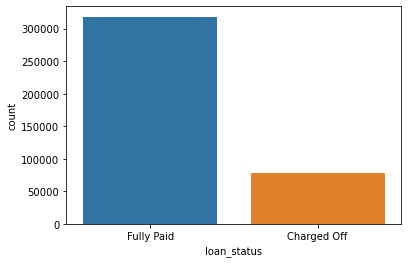

In [9]:
sns.countplot(data=df, x='loan_status')

<AxesSubplot:>

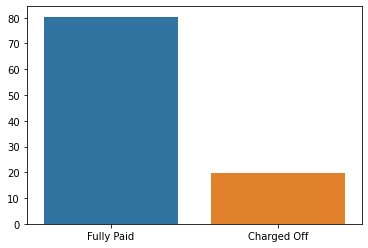

In [10]:
#interesting! let's switch the total values with a percentage.
loan_status_percent = df['loan_status'].value_counts(normalize=True) * 100
loan_status_percent
sns.barplot(x=loan_status_percent.index, y=loan_status_percent.values)

In [11]:
#maybe it's better to just print it out instead of a plot
df['loan_status'].value_counts(normalize=True) * 100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

**Now to analyze the loan_amnt column, since it looks like one of the most interesting features.**

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

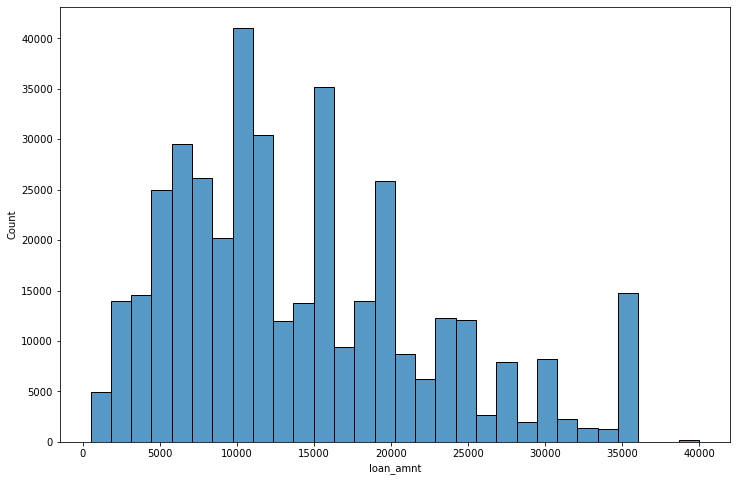

In [12]:
#histogram to get a grasp of the distribution of loan values
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='loan_amnt', bins=30)

In [13]:
# There were some spikes in the data so I assume these are popular values. Let's confirm it.
df['loan_amnt'].value_counts()

10000.0    27668
12000.0    21366
15000.0    19903
20000.0    18969
35000.0    14576
           ...  
36225.0        1
950.0          1
37800.0        1
30050.0        1
725.0          1
Name: loan_amnt, Length: 1397, dtype: int64

**As expected, the loan values that are vastly more abundant are even and popular values, such as 10.000, 12.000 and 35.000**

**Let's explore the correlation between the continuous feature variables. This will give me a grasp of where the highly correlated features are so I know what to focus on afterwards.**

In [14]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**It's tiring and confusing to visualize this huge table with just raw numbers. Let's visualize this using a heatmap instead.**


<AxesSubplot:>

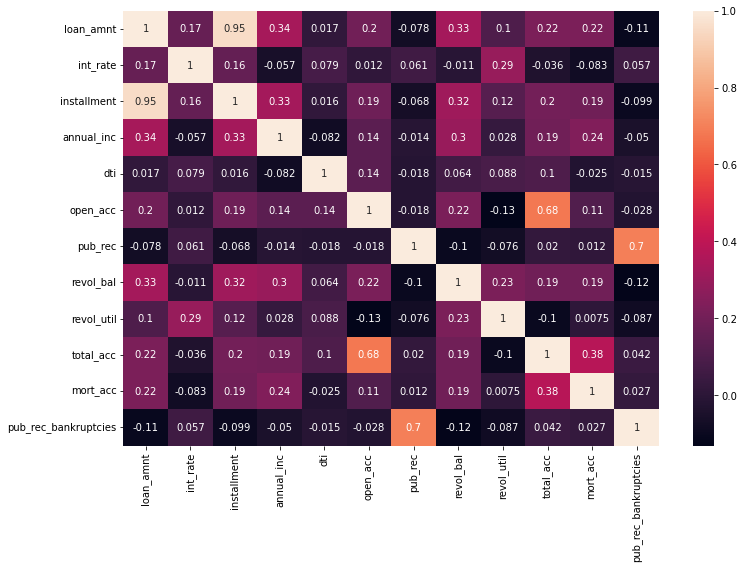

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(), annot=True)

**Much better! It's much easier to notice the brighter spots which represent highly correlated features. (darker spots could also be interesting if they had highly negative values, such as "0.8", but in this case, there are no such correlation values).
I notice almost perfect correlation with the "installment" feature. Time to explore this feature further. High correlation is interesting, but too much means it will be a perfect predictor of the label, resulting in further issues with the model.**

In [16]:
feat_info('installment')
feat_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

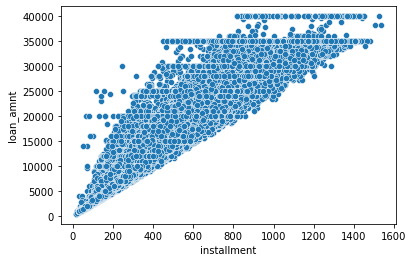

In [17]:
sns.scatterplot(data=df, x='installment',y='loan_amnt')

**Since the installments are basically the monthly payments, it makes sense that, the bigger the loan, the higher these payments are. It's a useful feature, and not a perfect predictor as there is still much variance. e.g. an 800 installment may mean a 20.000 dollar loan or a 35.000 dollar loan**

**Let's check out the distribution and the relationshin between the loan_status and the loan_amnt with a boxplot.**

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

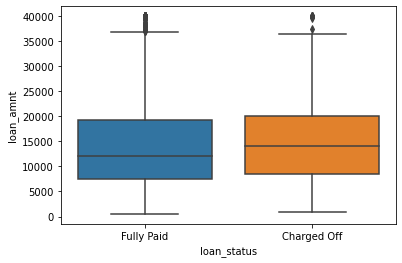

In [18]:
sns.boxplot(data=df, x='loan_status', y='loan_amnt')

**No clear relationship between loan status and loan amount found. Let's confirm it by calculating the summary statistics for the loan amount, grouped by the loan_status.**

In [19]:
df.groupby(by='loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Both boxplots and the stats are extremely similar, so there is no clear relationship between the loan amount and it being paid.**

**Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans.**

In [20]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [21]:
#let's sort the results
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [22]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**Let's explore these grades further with a countplot while also adding a loan_status hue to the plot, to see if there is any correlation.**

<AxesSubplot:xlabel='grade', ylabel='count'>

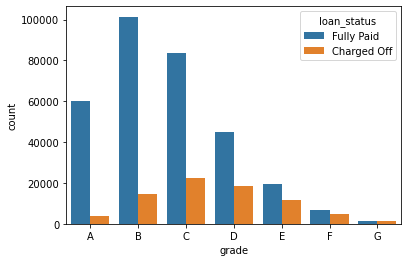

In [23]:
sns.countplot(data=df, x='grade', hue='loan_status', order=df['grade'].sort_values().unique())

**Now onto the subgrades.**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

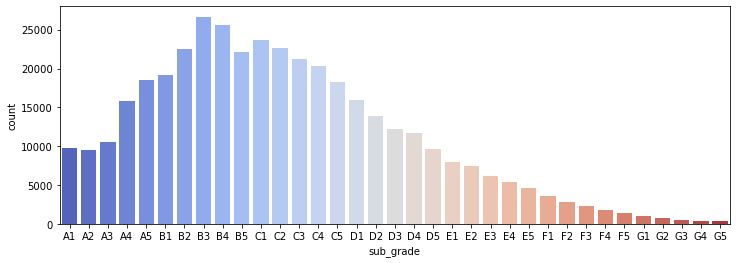

In [24]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='sub_grade', order=df['sub_grade'].sort_values().unique(), palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

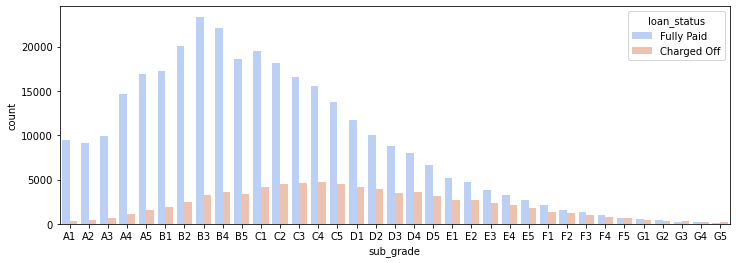

In [25]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='sub_grade', order=df['sub_grade'].sort_values().unique(), hue='loan_status',palette='coolwarm', alpha=0.9)

**Interesting! it looks like the 'Fully Paid' peak occurs at the B3 subgrade while the unpaid loans peak later at the C4 subgrade, while following a similar distribution to a normal distribution. Furthermore, the F and G grades don't get paid often, compared to the others. This means that a higher letter grade comes with a higher risk of a person not paying their loan.**

**Let's isolate the F and G grades and recreate the countplot just for those subgrades.**

In [26]:
df[df['sub_grade'] > 'E5']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
66,15975.0,60 months,24.99,468.80,F,F4,carrier,5 years,MORTGAGE,47000.00,...,10.0,0.0,2049.0,58.5,23.0,w,INDIVIDUAL,1.0,0.0,"59681 Christopher Lock\nNorth Williamtown, UT ..."
87,30000.0,60 months,24.70,875.28,G,G1,Medtronic,5 years,MORTGAGE,187321.00,...,21.0,0.0,54810.0,93.4,52.0,f,INDIVIDUAL,3.0,0.0,"25281 Kevin Neck\nArmstrongton, TN 29597"
96,12625.0,60 months,25.78,376.36,F,F5,Nursing Assistant,7 years,MORTGAGE,43000.00,...,18.0,0.0,19993.0,55.7,31.0,w,INDIVIDUAL,1.0,0.0,"522 Melissa Village\nEast Janice, MT 00813"
97,13400.0,60 months,25.83,399.86,G,G2,DESIGNER,10+ years,MORTGAGE,56000.00,...,23.0,0.0,28845.0,84.5,44.0,w,INDIVIDUAL,6.0,0.0,"0326 Jacob Via\nJacksonstad, MI 93700"
123,30000.0,60 months,23.83,860.09,F,F5,Victorian Senior Care,10+ years,MORTGAGE,72500.00,...,7.0,0.0,6875.0,94.2,32.0,f,INDIVIDUAL,4.0,0.0,"8219 Dennis Station Apt. 722\nBateston, LA 70466"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395875,10000.0,60 months,24.50,290.59,F,F3,soldier,10+ years,RENT,54000.00,...,10.0,0.0,23783.0,91.1,26.0,w,INDIVIDUAL,2.0,0.0,"PSC 1848, Box 3238\nAPO AA 29597"
395908,4075.0,36 months,24.99,162.00,F,F4,NaN,NaN,RENT,13000.00,...,7.0,0.0,4224.0,49.7,13.0,w,INDIVIDUAL,0.0,0.0,"57621 Benjamin Greens Apt. 527\nSouth Richard,..."
395957,14525.0,60 months,21.99,401.09,F,F1,AUDITOR,5 years,RENT,55000.00,...,7.0,1.0,5304.0,67.1,28.0,w,INDIVIDUAL,2.0,1.0,639 Gillespie Forge Apt. 571\nEast Robertmouth...
395976,16475.0,60 months,25.83,491.62,G,G2,assembly technician,7 years,OWN,55000.00,...,17.0,0.0,15548.0,41.2,55.0,f,INDIVIDUAL,0.0,0.0,"0288 Joseph Lakes Suite 493\nLarsonfurt, ID 70466"


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

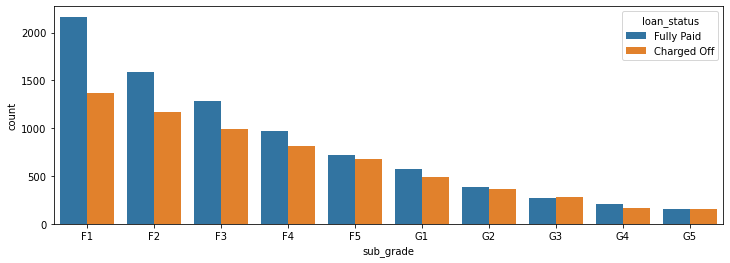

In [27]:
#first, filter the dataframe to only get the subgrades in grades F and G
fildf = df[df['sub_grade'] > 'E5']

#Then, create the plot with the filtered dataframe and ordered subgrades
plt.figure(figsize=(12,4))
sns.countplot(data=fildf, x='sub_grade', order=fildf['sub_grade'].sort_values().unique(), hue='loan_status')

**The label column is better off containing either a 1 or a 0 for the model instead of those weird names. So let's create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [28]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [29]:
#since we only have 2 values, we can map 'Fully Paid value to 1 and anything else aka 'Charged off' to 0
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

In [30]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Alright, now that I transformed 'loan_status' into a numeric column 'loan_repaid', I can plot out the correlation with the features in a bar plot.**

<AxesSubplot:>

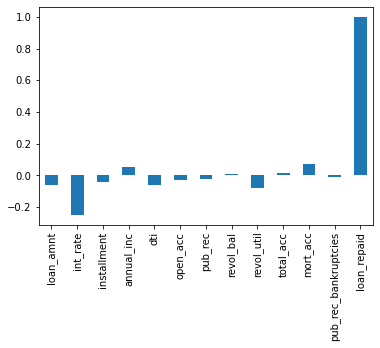

In [31]:
df.corr()['loan_repaid'].plot.bar()
#it's hard to understand this graph with the loan_repaid bar there. I'll remove it as it is useless and redundant.

<AxesSubplot:>

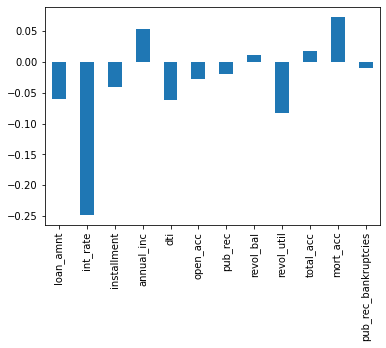

In [32]:
df.corr()['loan_repaid'].drop('loan_repaid').plot.bar()
#much better, but it can still use some sorting so it's clear to see which features have the most correlation with the label

<AxesSubplot:>

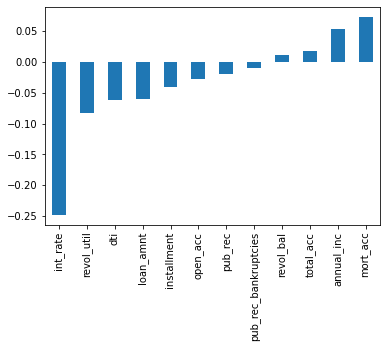

In [33]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')
#perfect! int_rate is by far the numeric feature with the most (inverse) correlation, even though not a lot.

In [34]:
df.corr().loc['int_rate', 'loan_repaid']

-0.24775751021449471

In [35]:
feat_info('int_rate')

Interest Rate on the loan


**Well, it makes a lot of sense that the higher the interest rate, the lower the chance that the person will be able to pay back the loan. It's also common for the lender to attribute a higher interest rate to more risky loans, to offset the risk.**

# Section 2: Data PreProcessing

**This step is essential to ensure high data quality values so further analysis can be conducted. To that end, I will remove or fill any missing data, remove unnecessary or repetitive features and convert categorical string features to dummy variables.**


In [36]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore the missing data first. First, I'll check if there are any missing values and, if so, the columns in which they are located. Then, I will use a variety of factors to decide whether or not they would be useful, to see if I should keep, discard, or fill in the missing data.**

<AxesSubplot:>

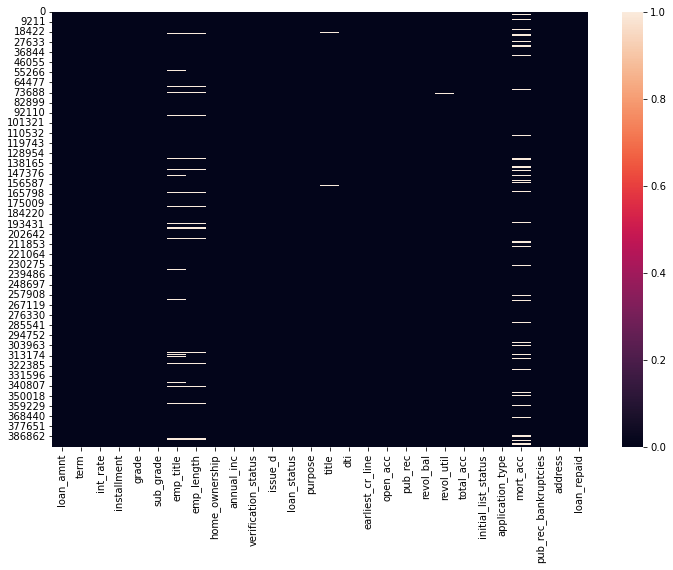

In [37]:
#Through this heatmap plot, we can get an overall picture of which columns have missing values and their density.
plt.figure(figsize=(12,8))
sns.heatmap(data=df.isnull())

**While we may get an overall picture of it, a more specific analysis is needed. Let's check the percentage of missing values.**

In [38]:
# total number of rows
len(df)

396030

<AxesSubplot:>

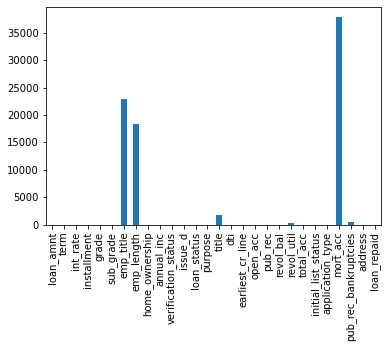

In [39]:
# plot with total count of missing values per column
df.isnull().sum().plot(kind='bar')

In [40]:
# and the actual values
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [41]:
# Converting the missing values to a percentage of the total rows
df.isnull().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [42]:
#let's just show the ones with missing values
def col_miss():
    return df.isnull().sum()[df.isnull().sum() > 0]
col_miss()

emp_title               22927
emp_length              18301
title                    1755
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

**Let's examine emp_title and emp_length to see whether it will be okay to drop them.**

In [43]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [44]:
# how many unique employment job titles
df['emp_title'].nunique()

173105

In [45]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. In this case, as the goal is to build a machine learning model, this column is not useful. Let's remove the emp_title column.**

In [46]:
df.drop('emp_title',axis=1, inplace=True)

**Let's create a count plot of the emp_length feature column.**

In [47]:
# same as before: number of unique values and the count of each value
print(df.emp_length.nunique())
print('\n')
print(df.emp_length.value_counts())
# also possible to get a list of each unique value
print('\n')
print(df.emp_length.unique())

11


10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64


['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]


In [48]:
# we need the correct order for the plot to be sorted
emp_length_order = [ '< 1 year',
                     '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

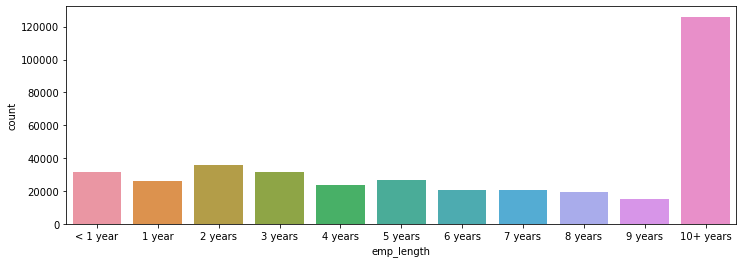

In [49]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

**Let's explore the relationship between this column and the target (loan_status). I'll make a countplot with a hue separating Fully Paid vs Charged Off**

<AxesSubplot:xlabel='emp_length', ylabel='count'>

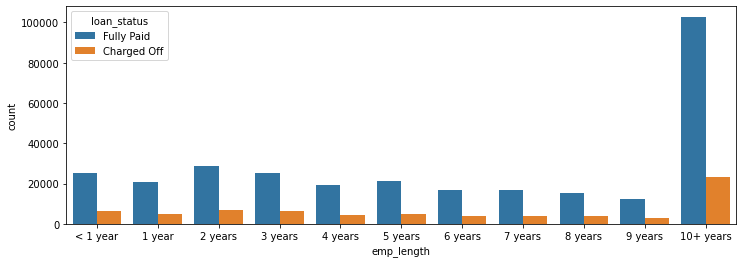

In [50]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order, hue='loan_status')

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category, which will essentially inform us of the percentage of people per employment category that didn't pay back their loan.**

In [51]:
# this is the count of charged off loans per emp_length category.
df[df['loan_status'] == 'Charged Off']['emp_length'].value_counts()

10+ years    23215
2 years       6924
< 1 year      6563
3 years       6182
1 year        5154
5 years       5092
4 years       4608
7 years       4055
6 years       3943
8 years       3829
9 years       3070
Name: emp_length, dtype: int64

In [52]:
# now we use the previous count and divide it by the total values of each column to get the percent value of "Charged Off"s
df[df['loan_status'] == 'Charged Off']['emp_length'].value_counts() / df['emp_length'].value_counts()

1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: emp_length, dtype: float64

In [53]:
# a more elegant way of doing the same thing :)
charged_off_count = df[df['loan_status'] == 'Charged Off']['emp_length'].value_counts()
column_count = df['emp_length'].value_counts()

charged_off_percent = charged_off_count / column_count
charged_off_percent

1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: emp_length, dtype: float64

<AxesSubplot:>

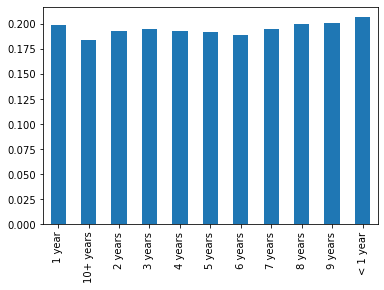

In [54]:
charged_off_percent.plot(kind='bar')

**Conclusion: Charge off rates are extremely similar across all employment lengths, which means this column has no correlation with the target label. Let's go ahead and drop the emp_length column.**

In [55]:
df.drop('emp_length',axis=1, inplace=True)

**Revisit the DataFrame to see what feature columns still have missing data.**

In [56]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Let's review the title column vs the purpose column. Is this repeated information?**

In [57]:
feat_info('title')
feat_info('purpose')

The loan title provided by the borrower
A category provided by the borrower for the loan request. 


In [58]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [59]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is simply a string subcategory/description of the purpose column.The title column can be safely dropped.**

In [60]:
df.drop('title',axis=1, inplace=True)

**Let's see what the mort_acc feature represents**

In [61]:
feat_info('mort_acc')

Number of mortgage accounts.


In [62]:
df['mort_acc'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 30., 31., 32., 34., nan])

In [63]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**There are many ways to deal with this missing data, like, for example, fill it with the column mean. But I'll try to be smarter about it. Let's review the other columns to see which most highly correlates to mort_acc**

In [64]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [65]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


**Looks like the total_acc feature correlates with the mort_acc, which makes sense! Let's group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.**

In [66]:
# mean of mort_acc for every total_acc number
df.groupby(by='total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series created above.**

In [67]:
mean_mort_acc = df.groupby('total_acc').mean()['mort_acc']

In [68]:
# this function returns the mort_acc mean when it encounters a nan value. If the value exists already, return that value
# it runs once, not recursively aka for one value only
def fill_mort_na(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return mean_mort_acc[total_acc]
    else:
        return mort_acc

In [69]:
# using the previously defined function, it is possible to fill the missing values recursively with this lambda function
# it basically runs the function once for every unique total_acc value.
df['mort_acc'] = df.apply(lambda x: fill_mort_na(x['total_acc'],x['mort_acc']), axis=1)

In [70]:
df['mort_acc'].tail(10)

396020    1.000000
396021    3.220866
396022    0.000000
396023    4.000000
396024    0.000000
396025    0.000000
396026    1.000000
396027    0.000000
396028    5.000000
396029    1.358013
Name: mort_acc, dtype: float64

In [71]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.2% of the total data. It's safe to remove the rows that are missing those values in those columns.**

In [72]:
#to know the percentage of missing values in each column
df.isnull().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [73]:
df = df.dropna()

In [74]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**That's it for the missing data! Now it's time to deal with the string values due to the categorical columns.**

In [75]:
# Shows all non-numeric columns
df.select_dtypes(exclude=['number']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**I can convert the term feature into either a 36 or 60 integer numeric data type.**

In [76]:
# this gives me the exact possible values in this column so I can just copy paste it into the function. 
# Notice there's a tricky space before the values.
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [77]:
# just in case, to restore the column as original data because I messed up on the first tries of defining the lambda function
# df['term'] = pd.read_csv('../DATA/lending_club_loan_two.csv', usecols=['term'])

In [78]:
# this lambda function transforms the categorical values into the respective numeric value
df['term'] = df['term'].apply(lambda x: 36 if x == ' 36 months' else 60)

In [79]:
# values are correctly mapped and dtype is integer
df['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

### grade feature

**We already know grade is part of sub_grade, so it's safe to just drop the grade feature (redundant).**

In [80]:
df = df.drop('grade', axis=1)

In [81]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

**Let's convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe.**

In [82]:
dummy_subgrade = pd.get_dummies(data=df['sub_grade'], drop_first=True)

In [83]:
df = pd.concat([df, dummy_subgrade], axis=1)

In [84]:
df = df.drop('sub_grade',axis=1)

In [85]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [86]:
df.select_dtypes(exclude=['number']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type, initial_list_status,purpose 
**I'll do the same with these columns, all at the same time.**

In [87]:
df['verification_status'].unique()
df['application_type'].unique()
df['initial_list_status'].unique()
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [88]:
dummy_df = pd.get_dummies(data=df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)

In [89]:
df = pd.concat([df, dummy_df], axis=1)

In [90]:
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1)

In [91]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [92]:
df.select_dtypes(exclude=['number']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

### home_ownership
**Let's analyze the home_ownership column.**

In [93]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**I'll do the same and convert these to dummy variables BUT replace 'NONE' and 'ANY' with 'OTHER', so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER.**

In [94]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if x == 'ANY' or x == 'NONE' else x)

In [95]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [96]:
dummy_home = pd.get_dummies(df['home_ownership'], drop_first=True)

In [97]:
df = pd.concat([df, dummy_home], axis=1)

In [98]:
df = df.drop('home_ownership',axis=1)

In [99]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

### address
**Let's feature engineer a zip code column from the address. I'll create a column called 'zip_code' that extracts the zip code from the address column.**

In [100]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [101]:
# this lambda function gets the last element of the address which is the zip-code
df['zip_code'] = df['address'].apply(lambda x: x.split()[-1])

In [102]:
df['zip_code'].nunique()

10

**Now I just turn the zip_code column into dummy variables.**

In [103]:
dummy_zip = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df, dummy_zip], axis=1)
df = df.drop('address', axis=1)

In [104]:
df = df.drop('zip_code',axis=1)

In [105]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, so dropping this feature is the correct choice.**

In [106]:
feat_info('issue_d')

The month which the loan was funded


In [107]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line
**This appears to be a historical time stamp feature. I can extract the year from this feature, then convert it to a numeric feature.**

In [108]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [109]:
# get the last 4 digits
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: x[-4:])

In [110]:
df['earliest_cr_year'] = pd.to_numeric(df['earliest_cr_year'])

In [111]:
df['earliest_cr_year'].dtype

dtype('int64')

In [112]:
df['earliest_cr_year'].head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_year, dtype: int64

In [113]:
df = df.drop('earliest_cr_line',axis=1)

In [114]:
df.select_dtypes(exclude=['number']).columns

Index(['loan_status'], dtype='object')

## Train Test Split

**Import train_test_split from sklearn.**

In [115]:
from sklearn.model_selection import train_test_split

**Time to drop the load_status column, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [116]:
df.drop('loan_status',axis=1, inplace=True)

**I'll use .sample() to grab a sample of the data to save time on training, since this is just a personal project.**

In [117]:
# sample that encompasses 10% of the original data
dfs = df.sample(frac=0.1,random_state=42)
print(len(dfs))

39522


**Now for the train test split, we set X and y variables to the values of the features and label.**

In [118]:
# features
X = dfs.drop('loan_repaid',axis=1)
# label
y = dfs['loan_repaid']

In [119]:
len(X)

39522

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalizing the Data

**I'll use a MinMaxScaler to normalize the feature data X_train and X_test. Reminder that we don't want data leakage from the test set so I'll only fit on the X_train data.**

In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
scaler = MinMaxScaler()

In [123]:
scaler.fit(X_train)

MinMaxScaler()

In [124]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Section 3: Creating the Model

**Importing the necessary Keras functions.**

In [125]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

**Building a sequential model to be trained on the data. There are unlimited options on the initial setup, but I'll get the number of columns, use it as the number of neurons on the input layer and create a hidden layer with half the neurons of the previous layer, which goes like this:**

**78 -> 39 -> 1 (last is the output layer). I'll add some dropout layers as well to optimize the model.**

In [126]:
len(X.columns)

78

In [127]:
model = Sequential()

#input layer
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Fitting the model to the training data for 100 epochs. It will probably overfit so I will add an early stopping feature. I'll also add in the validation data (which would usually be a different set of data, but in this case, will be the testing data) for later plotting.**

In [128]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(x=X_train,y=y_train,epochs=100,batch_size=256, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100


124/124 [==============================] - 9s 18ms/step - loss: 0.4386 - accuracy: 0.8231 - val_loss: 0.3131 - val_accuracy: 0.8875
Epoch 2/100
124/124 [==============================] - 1s 6ms/step - loss: 0.3096 - accuracy: 0.8840 - val_loss: 0.2757 - val_accuracy: 0.8906
Epoch 3/100
124/124 [==============================] - 1s 7ms/step - loss: 0.2844 - accuracy: 0.8874 - val_loss: 0.2669 - val_accuracy: 0.8903
Epoch 4/100
124/124 [==============================] - 1s 6ms/step - loss: 0.2746 - accuracy: 0.8889 - val_loss: 0.2635 - val_accuracy: 0.8908
Epoch 5/100
124/124 [==============================] - 1s 5ms/step - loss: 0.2703 - accuracy: 0.8888 - val_loss: 0.2620 - val_accuracy: 0.8901
Epoch 6/100
124/124 [==============================] - 1s 7ms/step - loss: 0.2686 - accuracy: 0.8887 - val_loss: 0.2607 - val_accuracy: 0.8897
Epoch 7/100
124/124 [==============================] - 1s 10ms/step - loss: 0.2649 - accuracy: 0.8899 - val_loss: 0.2593 - val_accuracy: 0.

**Saving the model.**

In [129]:
from tensorflow.keras.models import load_model

In [130]:
model.save('NN_project_model')

INFO:tensorflow:Assets written to: NN_project_model\assets


INFO:tensorflow:Assets written to: NN_project_model\assets


# Evaluating Model Performance.

**Time to see how the model is doing. I'll plot out the validation loss and the training loss.**

<AxesSubplot:>

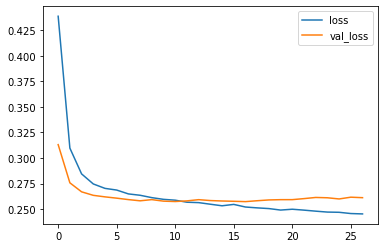

In [131]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()

**Now I can use the test data to create the model predictions and display a classification report and confusion matrix.**

In [132]:
from sklearn.metrics import classification_report, confusion_matrix

In [133]:
predictions = model.predict(X_test)

248/248 [==============================] - 1s 3ms/step


In [134]:
# converting values to 0s if below 0.5 and 1s if above 0.5
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

In [135]:
# reminder that 0 means the loan was charged off and 1 means it was fully paid
print(confusion_matrix(y_test, binary_predictions))
print('\n')
print(classification_report(y_test, binary_predictions))

[[ 682  827]
 [  47 6349]]


              precision    recall  f1-score   support

           0       0.94      0.45      0.61      1509
           1       0.88      0.99      0.94      6396

    accuracy                           0.89      7905
   macro avg       0.91      0.72      0.77      7905
weighted avg       0.89      0.89      0.87      7905



# Interpretation

**The model seems to perform very well on predicting people who will fully pay the loan back, since it has very high precision, recall and f1-score values on the value '1' aka customers that paid off the loan. Furthermore, the recall value being extremely near 1.00 means the model "catches" just about all the loans that are actually fully paid.**

**Unfortunately, the model is not so efficient with payments that will get charged off: high precision means that if the model predicts a charge off, it will most likely be correct BUT the very low recall value means the model still misses most of the actual charged off entries. It will need some better feature engineering and hyper-parameter tuning.**

**If the company's priority or policy is to ensure that it doesn't refuse service to customers that will surely pay the loans, the model in its current iteration, will be of great benefit. On the other hand, if the company cannot afford to have loans charged off, the model will still need some work.**